## ML_Assignment_6
1. In the sense of machine learning, what is a model? What is the best way to train a model?
2. In the sense of machine learning, explain the "No Free Lunch" theorem.
3. Describe the K-fold cross-validation mechanism in detail.
4. Describe the bootstrap sampling method. What is the aim of it?
5. What is the significance of calculating the Kappa value for a classification model? Demonstrate how to measure the Kappa value of a classification model using a sample collection of results.
6. Describe the model ensemble method. In machine learning, what part does it play?
7. What is a descriptive model's main purpose? Give examples of real-world problems that descriptive models were used to solve.
8. Describe how to evaluate a linear regression model.

9. Distinguish:-
    1. Descriptive vs. predictive models
    2. Underfitting vs. overfitting the model
    3. Bootstrapping vs. cross-validation

10. Make quick notes on:-
    1. LOOCV.
    2. F-measurement
    3. The width of the silhouette
    4. Receiver operating characteristic curve

### Ans 1

In the context of machine learning, a model is a mathematical representation or algorithm that learns patterns and relationships from data. It serves as the core component of a machine learning system and is used to make predictions or decisions based on new, unseen data.

The best way to train a machine learning model depends on the specific algorithm and problem you are working on, but the general process typically involves these steps:

1. **Data Collection**: Gather a labeled dataset that includes input features and corresponding target values. The data should be representative of the problem you want the model to solve.

2. **Data Pre-processing**: Clean and prepare the data by handling missing values, scaling features, and encoding categorical variables.

3. **Splitting Data**: Divide the dataset into training and testing sets. The training set is used to train the model, while the testing set is used to evaluate its performance.

4. **Model Selection**: Choose an appropriate machine learning algorithm or model that suits the problem's nature (e.g., regression, classification, clustering). Consider factors like model complexity, interpretability, and performance.

5. **Model Training**: Feed the training data into the chosen model, which learns patterns and relationships between the input features and target values.

6. **Hyperparameter Tuning**: Adjust hyperparameters (e.g., learning rate, number of layers) to optimize the model's performance.

7. **Model Evaluation**: Assess the model's performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, RMSE).

8. **Deployment**: Once satisfied with the model's performance, deploy it in a real-world environment where it can make predictions on new, unseen data.

9. **Monitoring and Maintenance**: Continuously monitor the model's performance and update it as needed to ensure it remains accurate and relevant.

The best way to train a model also involves understanding the problem domain, choosing the right features, and experimenting with different algorithms and techniques to achieve the desired outcome. It often requires an iterative process of refinement and improvement.

Here's a simple example that demonstrates the process of training a machine learning model using the popular scikit-learn library. In this example, we'll use a basic linear regression model for simplicity. This code demonstrates the key steps of data splitting, model training, prediction, and evaluation for a simple linear regression problem. It's a basic example to illustrate the process.

Mean Squared Error: 0.07
R-squared: 0.97


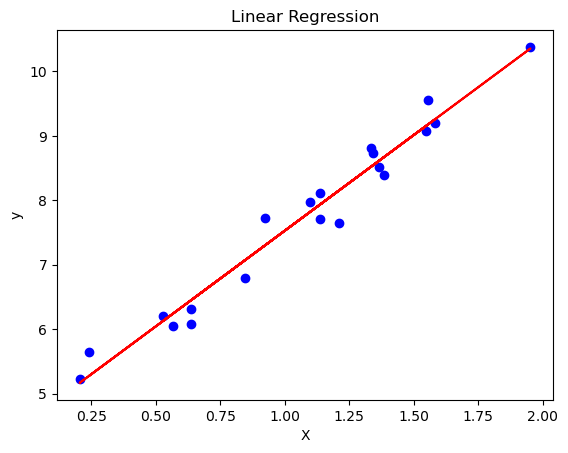

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the regression line
plt.scatter(X_test, y_test, color='b')
plt.plot(X_test, y_pred, color='r')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.show()

### Ans 2

The "No Free Lunch" theorem is a fundamental concept in machine learning and optimization that suggests that there is no one-size-fits-all algorithm or model that performs best for every problem. In essence, it states that there is no universally superior machine learning algorithm that can outperform all others across all possible datasets.

The theorem implies that the performance of a machine learning algorithm is closely tied to the characteristics of the specific problem it is applied to. Different algorithms excel in different problem domains and scenarios. For example:

- Decision trees may perform well on problems with discrete and interpretable features.
- Support vector machines might excel in high-dimensional spaces.
- Neural networks may handle complex patterns in large datasets.

The "No Free Lunch" theorem emphasizes the importance of choosing the right machine learning algorithm for a given problem and dataset. To do so effectively, data scientists and machine learning practitioners need to understand the nature of the problem, the characteristics of the data, and the strengths and weaknesses of various algorithms. Experimentation and tuning are often required to find the best-performing approach for a specific task.

It's more of a guiding principle to help data scientists and machine learning practitioners understand that no single algorithm is universally superior for all problems. Let's consider the classic Iris dataset and evaluate three different classifiers: **Decision Tree**, **Random Forest**, and **Support Vector Machine (SVM)**.

In this example, we compare three different classifiers on the Iris dataset and evaluate their accuracy. It demonstrates that the performance of each classifier may vary depending on the specific dataset and problem. This illustrates the essence of the "No Free Lunch" theorem, emphasizing the importance of selecting the right algorithm for a particular task.

As all models gave 1.0 accuracy but The "No Free Lunch" theorem still holds because there are many other datasets and problems where different algorithms would perform differently, and perfect accuracy is not attainable.

Accuracy for DecisionTreeClassifier: 1.00
Accuracy for RandomForestClassifier: 1.00
Accuracy for SVC: 1.00


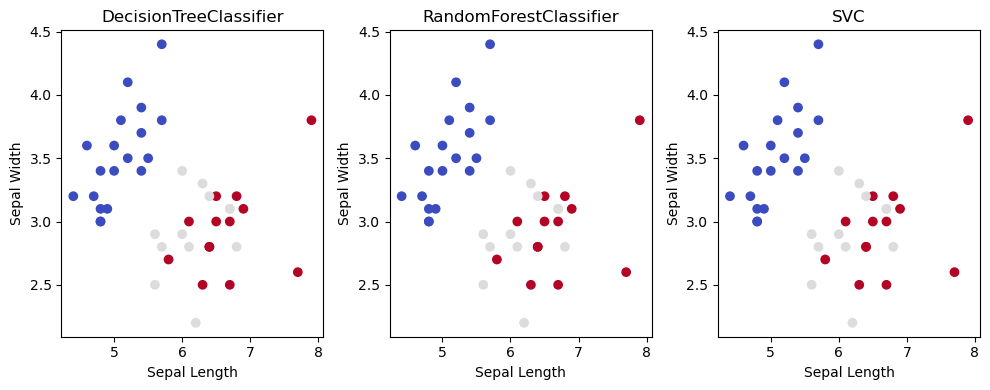

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and evaluate different classifiers
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), SVC()]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {clf.__class__.__name__}: {accuracy:.2f}")

# Plot the results
class_names = iris.target_names
plt.figure(figsize=(10, 4))
for i, clf in enumerate(classifiers):
    plt.subplot(1, 3, i + 1)
    plt.title(clf.__class__.__name__)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')

plt.tight_layout()
plt.show()

### Ans 3

**K-fold cross-validation** is a widely used technique in machine learning for evaluating the performance of a model while efficiently utilizing available data. It helps assess a model's generalization ability and reduces the risk of overfitting or underfitting. Here's a detailed explanation of how K-fold cross-validation works:

1. **Data Splitting**: The dataset is divided into K roughly equal-sized subsets or folds, typically with random shuffling to ensure randomness. Each fold contains an approximately equal distribution of data samples.

2. **Model Training and Testing**: The cross-validation process then proceeds through K iterations or "folds." In each iteration:
   - One of the K folds is used as the testing set.
   - The remaining K-1 folds are used for training the model.
   - The model is trained on the training folds and evaluated on the testing fold.

3. **Performance Metrics**: Performance metrics (e.g., accuracy, mean squared error) are computed for each fold, providing K separate performance scores.

4. **Average Performance**: The K performance scores are averaged to obtain a single performance metric that represents the model's overall performance.

Key benefits of K-fold cross-validation:
- Provides a more robust estimate of a model's performance by testing it on multiple subsets of the data.
- Maximizes data utilization since each data point serves both as part of the training set and the testing set.
- Helps identify potential issues with overfitting or underfitting.

Common choices for K in K-fold cross-validation include 5-fold, 10-fold, and leave-one-out (where K equals the number of data points). Researchers and practitioners choose K based on the dataset size and computational resources, aiming for a balance between reliability and efficiency.

In [4]:
'''
1. Load the Iris dataset.
2. Define the number of folds (K) as 5.
3. Create a KFold cross-validation splitter with shuffling.
4. Initialize a logistic regression classifier.
5. Perform K-fold cross-validation, fitting the model and
calculating scores for each fold.
6. Calculate and print the average cross-validation score,
which provides an estimate of the model's performance.
'''

import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Define the number of folds (K)
k = 5

# Create a KFold cross-validation splitter
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a classifier
classifier = LogisticRegression(max_iter=1000)

# Initialize a list to store cross-validation scores
cross_val_scores = []

# Perform K-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model on the training data
    classifier.fit(X_train, y_train)
    
    # Evaluate the model on the testing data
    score = classifier.score(X_test, y_test)
    
    # Append the score to the list of cross-validation scores
    cross_val_scores.append(score)

# Calculate and print the average cross-validation score
avg_score = np.mean(cross_val_scores)
print(f'Average Cross-Validation Score: {avg_score:.2f}')

Average Cross-Validation Score: 0.97


### Ans 4

The bootstrap sampling method is a resampling technique used in statistics and machine learning to estimate the sampling distribution of a statistic or to make inferences about a population from a single sample. Its primary aim is to assess the robustness and variability of statistical estimators without the need for additional data collection.

Here's how the bootstrap method works:

1. **Resampling**: Given an original dataset with N data points, the bootstrap method randomly samples N data points with replacement from the original dataset. This means that some data points may be sampled multiple times, while others may not be included in the resampled dataset.

2. **Repeated Sampling**: This resampling process is typically repeated a large number of times (B times) to create B bootstrap samples. Each bootstrap sample is essentially a simulated dataset drawn from the original data distribution.

3. **Statistical Estimation**: The statistic of interest (e.g., mean, variance, confidence interval) is calculated for each of the B bootstrap samples.

4. **Inference**: The collection of statistics derived from the bootstrap samples provides an empirical distribution of the statistic of interest. This distribution can be used to estimate confidence intervals, perform hypothesis tests, or assess the variability of the estimator.

The bootstrap method is particularly useful when the underlying data distribution is unknown or complex. It allows practitioners to make statistical inferences and quantify uncertainty without making strong assumptions about the data's distribution.

### Ans 5
The Kappa (κ) statistic, also known as Cohen's Kappa, is a measure of inter-rater agreement or classification model performance that assesses how well a model's predictions agree with the actual observed outcomes, while accounting for the possibility of agreement occurring by chance. It's particularly useful when dealing with imbalanced datasets.

The significance of calculating the Kappa value for a classification model includes:

1. **Adjusting for Chance**: Kappa adjusts the model's accuracy by considering the agreement expected by random chance. It provides a more robust measure than simple accuracy, especially when classes are imbalanced.

2. **Quantifying Agreement**: Kappa quantifies the agreement between the model's predictions and the true labels, taking into account both correct and incorrect predictions and providing a single numeric score.

3. **Interpretability**: Kappa values are easily interpretable. A value of 1 indicates perfect agreement, while a value of 0 suggests agreement equivalent to chance.

In this example, **true_labels** represent the actual class labels, and **predicted_labels** represent the model's predictions. The **cohen_kappa_score** function from scikit-learn is used to calculate the Kappa value. The resulting Kappa value indicates the level of agreement between the true labels and model predictions, accounting for agreement by chance.

In [5]:
from sklearn.metrics import cohen_kappa_score

# Sample true labels (ground truth)
true_labels = [1, 0, 1, 1, 0, 0, 1, 1]

# Sample model predictions
predicted_labels = [1, 0, 1, 0, 1, 0, 1, 1]

# Calculate the Kappa value
kappa = cohen_kappa_score(true_labels, predicted_labels)

print(f"Kappa Value: {kappa:.2f}")

Kappa Value: 0.47


### Ans 6

**Model ensemble methods** are techniques in machine learning that combine the predictions of multiple individual models (base learners) to create a stronger and more robust model. Ensemble methods play a significant role in improving the predictive performance and generalization of machine learning models. They are widely used in various applications and competitions, including Kaggle competitions and real-world problems. Here's an overview of their significance and role:

1. **Improved Accuracy**: Ensemble methods aim to reduce bias and variance in predictions. By combining the outputs of multiple models, they often produce more accurate and reliable predictions than individual models.

2. **Robustness**: Ensembles are less susceptible to overfitting because they incorporate diverse models that may have different strengths and weaknesses. This makes them more robust on unseen data.

3. **Risk Mitigation**: They help mitigate the risk of choosing a single, suboptimal model by leveraging the wisdom of the crowd. Even if some base models perform poorly, others may compensate.

4. **Versatility**: Ensemble methods can be applied to various types of base learners, such as decision trees, support vector machines, neural networks, or any other machine learning algorithm.

5. **Diverse Approaches**: There are different ensemble techniques, including bagging (e.g., Random Forest), boosting (e.g., AdaBoost, Gradient Boosting), and stacking, each with its unique approach to combining models.

6. **Ensemble Diversity**: Ensemble methods benefit from diversity among base models. This diversity can be achieved through different sampling techniques, feature subsets, or model architectures.

Overall, ensemble methods are a crucial tool in a machine learning practitioner's toolkit for improving model performance, making predictions more robust, and achieving state-of-the-art results in various domains. They leverage the collective power of multiple models to tackle complex problems effectively.

In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier with 100 decision trees.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


### Ans 7

The main purpose of a **descriptive model** is to understand and summarize data, patterns, or relationships within a dataset. Descriptive models do not aim to make predictions or decisions but rather provide insights and explanations about the data. They are commonly used in data analysis, statistics, and data mining. Some real-world examples of problems where descriptive models are used include:

1. **Customer Segmentation**: Businesses use descriptive models to group customers based on purchasing behavior, demographics, or preferences. This helps tailor marketing strategies to different segments.

2. **Market Basket Analysis**: Retailers analyze customer transaction data to identify associations between products purchased together. This information can inform store layout and product placement.

3. **Healthcare Analytics**: Descriptive models are used to analyze patient records and identify trends in disease prevalence, treatment effectiveness, or patient outcomes.

4. **Financial Risk Assessment**: Banks and financial institutions use descriptive models to understand historical trends in credit risk, fraud detection, and market volatility.

5. **Climate Analysis**: Climate scientists employ descriptive models to analyze historical weather data and identify patterns in temperature, precipitation, or extreme events.

6. **Social Sciences**: Researchers use descriptive models to analyze survey data, census data, or social media data to understand trends in demographics, behavior, or sentiment.

The primary goal of descriptive models is to provide meaningful insights and summaries of data, enabling better decision-making, hypothesis generation, and further investigation. These models are often the first step in the data analysis process and serve as a foundation for more advanced modeling and predictive analytics.
 
In this example we demonstrates basic data analysis techniques using a iris dataset. 

1. We load the Iris dataset using scikit-learn and convert it into a Pandas DataFrame.
2. We calculate summary statistics such as mean, standard deviation, and quartiles using **describe()**.
3. We create histograms to visualize the distribution of each feature.
4. We calculate the correlation matrix between features and create a heatmap to visualize the relationships.

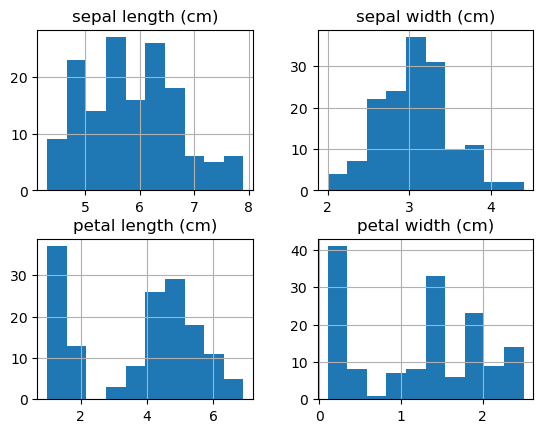

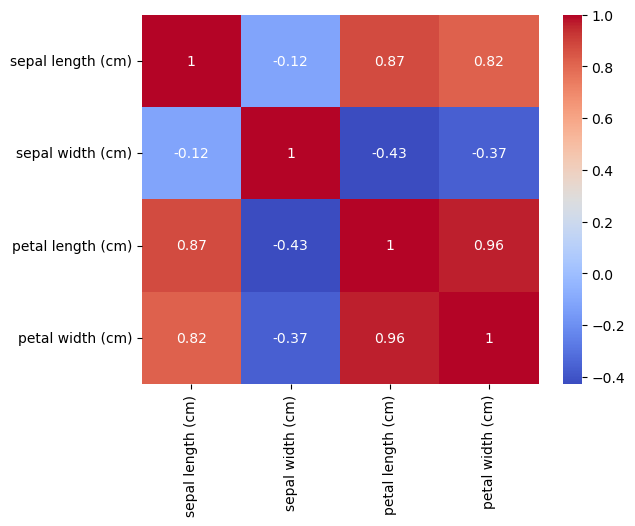

In [7]:
import pandas as pd

# sample dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Summary statistics
summary_stats = df.describe()

# Data visualization (histograms)
import matplotlib.pyplot as plt
df.hist()
plt.show()

# Correlation matrix and heatmap
correlation_matrix = df.corr()
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Ans 8

Evaluating a linear regression model is essential to understand its predictive performance and reliability. Here are steps to evaluate a linear regression model:

1. **Residual Analysis**: Examine the residuals, which are the differences between predicted and actual values. Plot residuals to check for patterns or heteroscedasticity (non-constant variance).

2. **Coefficient Significance**: Assess the significance of the coefficients (slope and intercept) using hypothesis tests or confidence intervals. Insignificant coefficients may indicate unnecessary predictors.

3. **R-squared (R²)**: Calculate the R-squared value, which measures the proportion of variance in the dependent variable explained by the model. Higher R² values indicate better fit, but avoid overfitting.

4. **Adjusted R-squared**: Consider the adjusted R², which accounts for the number of predictors. It penalizes adding irrelevant predictors.

5. **Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)**: Compute the MSE and RMSE to quantify the model's prediction errors. Lower values indicate better performance.

6. **Mean Absolute Error (MAE)**: Calculate the MAE as an alternative error metric that's less sensitive to outliers.

7. **Residual Plots**: Create residual plots, including scatterplots and Q-Q plots, to assess the normality and linearity assumptions.

8. **Cross-Validation**: Use cross-validation (e.g., k-fold cross-validation) to estimate the model's performance on unseen data and avoid overfitting.

9. **Outliers**: Identify and address outliers that can significantly impact model performance.

10. **Predictive Power**: Evaluate the model's predictive power by applying it to new data and comparing predicted values to actual outcomes.

Evaluating a linear regression model involves a combination of statistical tests, visualization, and error metrics to ensure its validity and usefulness for making predictions.

### Ans 9

1. **Descriptive vs. Predictive Models**:
   Descriptive models are designed to summarize and explain existing data patterns without making predictions for the future. Predictive models, conversely, focus on forecasting future outcomes based on historical data patterns, prioritizing accuracy in making forward-looking predictions.

2. **Underfitting vs. Overfitting the Model**:
   Underfitting occurs when a model is too simplistic, failing to capture complex data patterns and performing poorly. Overfitting, on the other hand, happens when a model is excessively complex, fitting noise in the data, which results in poor generalization to new data.

3. **Bootstrapping vs. Cross-Validation**:
   Bootstrapping is a resampling technique that generates multiple datasets by random sampling with replacement from the original data. Cross-validation involves splitting the data into subsets, allowing for robust model evaluation by training and testing on different subsets, facilitating better generalization and hyperparameter tuning.

### Ans 10

1. **LOOCV (Leave-One-Out Cross-Validation)**:
   - LOOCV is a cross-validation technique.
   - It uses each data point as a test sample while using the rest for training.
   - Evaluates model performance with minimal bias but can be computationally expensive for large datasets.

2. **F-Measurement (F1 Score)**:
   - F-measure combines precision and recall into a single metric.
   - It's used for evaluating classification models.
   - F1 Score = 2 * (Precision * Recall) / (Precision + Recall).
   - It balances precision (correct positive predictions) and recall (capturing all positive cases).

3. **Width of the Silhouette**:
   - Silhouette width is a metric for assessing cluster quality in clustering algorithms.
   - It measures how similar each data point is to its assigned cluster compared to other clusters.
   - Range: -1 (poor clustering) to +1 (well-separated clusters).
   - Values near 0 suggest overlapping clusters.

4. **Receiver Operating Characteristic (ROC) Curve**:
   - ROC curve visualizes a binary classification model's performance.
   - It plots the True Positive Rate (sensitivity) against the False Positive Rate (1-specificity) at various thresholds.
   - AUC (Area Under the Curve) quantifies the ROC curve's overall performance, with higher values indicating better model discrimination.